In [11]:

# imports
%matplotlib notebook
import sys
from astropy.table import Table
from astropy.io import fits

from specdb.specdb import UVQS
from astropy.table import Table
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import glob
import numpy.ma as ma
import math
from scipy.optimize import curve_fit
import pylab as plb
from scipy.optimize import fmin
from scipy import asarray as ar,exp

Line Fluxes:

In [ ]:
# OII3726 = 
# OII3729 = 
# Halpha = 


Equivalent Width Calculator

In [2]:
def eqw(flux, sigma, mean, continuum):
    gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp((-.5)*((x-mean)/(sigma))**2)
    ew = (flux * sigma * np.sqrt(2*np.pi))/(flux + continuum)

Load UVQS

In [8]:
uvqs = UVQS("/Users/catherinemanea/SOFTWARE/specdb/specdb/data/DB/UVQS_DB_v01.hdf5")

Database is uvqs
Created on 2017-Mar-13
Version: v01


In [12]:
spec,meta = uvqs.spectra_from_coord('J060819.93-715737.4')

Your search yielded 1 match[es] within radius=0.5 arcsec
Staged 1 spectra totalling 0.00048 Gb
Loaded spectra


/Users/catherinemanea/Documents/j0608/data/spec/linetools/linetools/spectra/xspectrum1d.py:254: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


<IPython.core.display.Javascript object>


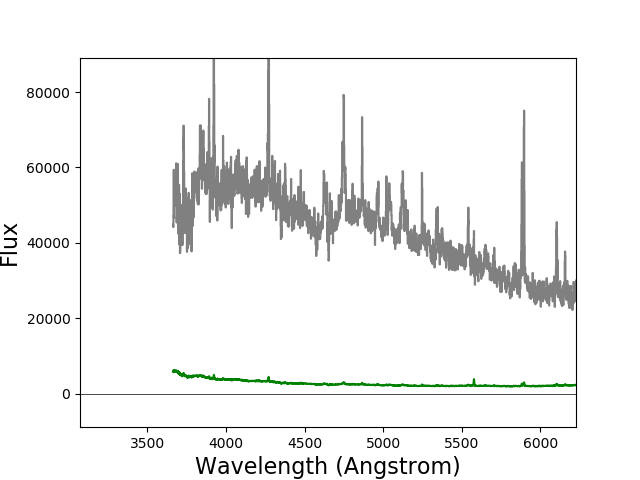

<function matplotlib.pyplot.show(*args, **kw)>

In [203]:
plt.figure()
spec.plot()
plt.show

#Original UVQS plot is in air (OI line in error spectrum is in air)

In [14]:
spec.vactoair()

<IPython.core.display.Javascript object>


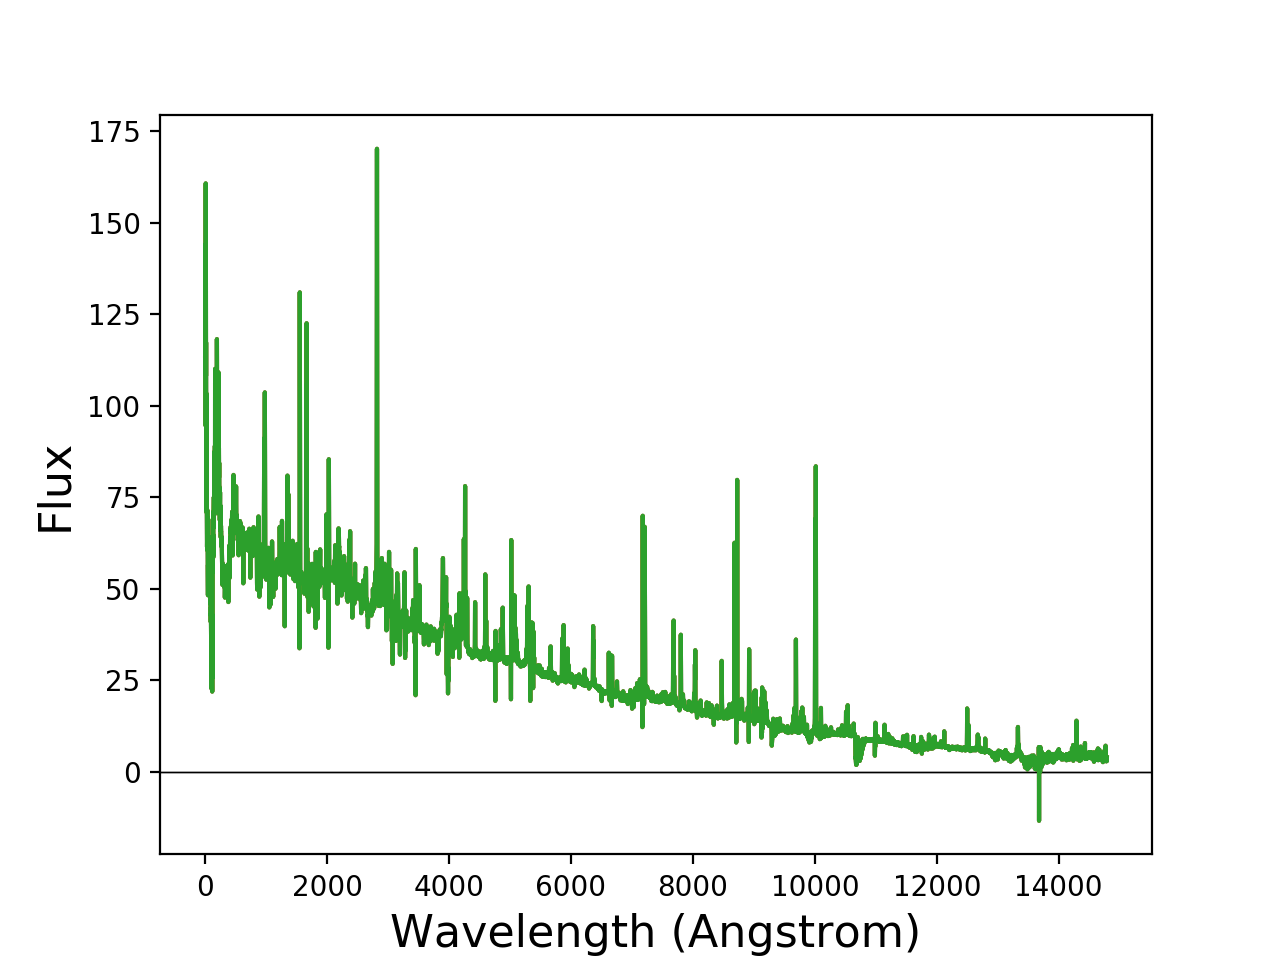

<function matplotlib.pyplot.show(*args, **kw)>

In [22]:
hdu = fits.open("/Users/catherinemanea/Documents/j0608/data/spec/UVQSJ0608_F.fits")
data = hdu[0].data
header = hdu[0].header
plt.figure()
plt.plot(data)
plt.show

In [159]:
c = 3*(10**8)

IDlist = np.array(["OII", "OII", "H-alpha", "CII", "CII", "CII", "CII", "CII", "CII", "CII", "CII?", 
                   "CII", "CII", "CII", "CII", "CII", "H-Beta","HeI", "HeI","H-Gamma","HeI","CII(blend)","CII","HeI","HeI",
                  "HeI","NII","CII","CII","CII","OI"])
wavelist = np.array([3726,3729,6562.8,4735.5,4738,4744.8,4747.3,3919,3920.7,4267,5696,5535,
                     5538,5640.5,5648.1,5662.5,4861.3,3888.8,4471.5,4340.5,4713.2,4727.4,
                    4867.1,4921.9,5015.7,5875.621,6583.4,6578.05,7231.32,7236.42,8446.5])
ltamplist = np.array([29.9566,41.9784,47.6674,8.60973,25.0131,38.4132,11.3409,
                     43.2061,63.0645,117.587,3.30404,12.0676,9.88802,11.2093,10.4825,
                     9.56858,21.9999,80.9721,23.2747,11.0857,13.5711,3.28066,8.32506,
                     8.81376,34.3857,50.7593,65.0618,46.8819,53.4903,68.5576,4.46199])
ltfluxlist = np.array([37.5148,72.6959,93.0115,12.4469,36.8169,53.0823,
                      15.9363,39.4765,75.722,198.201,10.5659,17.6963,14.698,
                      18.6603,15.0422,19.1306,49.5357,88.0376,25.116,15.2397,15.8319,15.9571,
                      13.147,8.29662,48.1474,90.8098,142.102,96.4231,121.826,169.349,17.4819])
ltsigmalist = np.array([0.522828,0.666173,0.77844,0.576744,0.587204,0.551288,0.560596,0.364505,
              0.479013,0.672446,1.27577,0.585022,0.593006,0.664124,0.572478,0.79761,0.898273,0.433753,
                       0.430504,0.548432,0.465402,1.94045,0.630011,0.375534,0.558606,0.713719,0.867336,
                       0.820514,0.908604,0.985458,1.56304])

ALISamps = np.array([42.77516531,77.85115049,88.62622324,19.17002521,39.62488863, 63.25722671,21.07628567,
           54.19253627, 85.23831526,192.32010224,9.33606369,25.52938878,19.38213465,
           26.79359870,19.28771929 ,30.17951390,50.40331768, 208.00193265,109.19890187,13.32376329,17.62988543,
                    11.62721036,12.67911646,15.17858440,142.14235722,106.30908122,127.44251529,
                    88.32574417,138.35055534,175.76359492,11.33401701])
ltEW = np.array([-0.600194,-1.19847,-6.19474,-0.309619,-0.956699,-1.32844,-0.397401,
                -0.615879,-1.25409,-3.92277,-0.499422,-0.637489,-0.521914,-0.862307,
                -0.681624,-0.821259,-1.53706,-1.69477,-0.637667,-0.343421,-0.44147,-0.4265,
                -0.39346,-0.273873,-1.59505,-4.30264,-10.2084,-6.77047,-7.40758,-11.3095,-2.82499])

testtrueamp = ALISamps/(np.sqrt(2*np.pi)*ltsigmalist)

ALISoutputerror = np.array([0.87617437,1.03550501,0.56233159,0.28312678,0.31445385,0.36953007,
                        0.30707780,0.63977559,0.53964196,0.83642652,0.54556913,0.52597222,
                        0.44849997,0,0,0,0.81205671,0.50978079,0.32922098,0.63076546,2.37350700,
                           1.05306788,0.64103538,5.03815439,1210.96099594,5.69184788,0.56036121,0.79831351,
                           0.48882168,0.57110389,1.91528482])
ALISamperror = ALISoutputerror/(np.sqrt(2*np.pi)*ltsigmalist)

disp = np.array([28.28465023,47.14162010,13.77654175,41.10321580,33.87979382,
                 34.07004398,35.51605182,24.92689087,29.96034149,33.73420455,
                51.83459374,15.63190002,18.85629699,30.39219607,19.64329905,44.10607868,38.62826586,32.03666039,31.53309417,
                12.34896758,11.41304437,94.08975441,19.65719492,0.62530241,33.39062709,24.98530095,21.82449280,17.75288092,
                27.99394419,30.25865637,2.83397483])

ALISredshift = np.array([0.00101732,0.00102614,0.00104012,0.00105062,0.00107972,
                        0.00108022,0.00106138,0.00109745,0.00112373,0.00117346,
                        0.00111300,0.00113552,0.00100232,0.00106467,0.00109566,0.00105423 ,0.00116290,0.00104850,
                        0.00106025,0.00106227,0.00110079,0.00103903,0.00104268,0.00108936,
                        0.00101082,0.00111684,0.00106292,0.00113536,0.00108473,0.00110801,0.00105236])
ALISwave = (ALISredshift*wavelist)+wavelist

ALISrederror = np.array([0.00000296,0.00000257,0.00000080,0.00000361,0.00000172,0.00000148,
                        0.00000326,0.00000212,0.00000098,0.00000072,0.00000751,0.00000169,
                        0.00000229,0.00000226,0.00000252,0.00000256,0.00000367,0.00013978,0,
                        0.00000391,0.00001187,0.00001790,0.00000422,0.00018845,0.00058806,
                        0.00000403,0.00000045,0.00000126,0.00000062,0.00000045,0.00000601])
ALISwaveerror = ((ALISredshift+ALISrederror)*wavelist)+wavelist - ALISwave

ALISsigmalist = (disp*ALISwave/c)*(10**3)

#ABSORPTION:

ALISabsorptionamp = np.array([0,0,0,0,0,0,0,0,0,0,0, 
                   0, 0, -10.24052136, -6.57399808, -17.94030836, 0,-131.49886020, -100.46678529,0,
                             -8.45369996,0,0,-24.47923733,-108.29356861,-32.55674125,0,-15.82288788,0,0,0])

ALISabsorptionred = np.array([0,0,0,0,0,0,0,0,0,0,0,
                     0,0.000925479066,0.000884101843,0.000881360881,0,0.000950462041,0.000970615563,0,
                             0.000842047469,0,0,0.000867151974,0.000926355975,0.000853892191,0,0.000791629062,0,0,0])
    
ALISabsorptiondisp = np.array([0,0,0,0,0,0,0,0,0,0,0,0,
                     0,0.80486820,0.77443895,15.68201579,0,36.68366252,34.66348842,0,17.43619941,
                              0,0,34.58230912,28.35008748,41.25975387,0,0.44705849,0,0,0])

LTabsorptionsigma = np.array([0,0,0,0,0,0,0,0,0,0,0,0,
                     0,0.0984104,0.357868,0.353257,0,0.34354,0.379122,0,0.283475,0,0,0.466662,
                             0.344306,0.713719,0,0.443785,0,0,0])
                              
ALISabsorptionwave = (ALISredshift*wavelist)+wavelist

ALISabsorbtionsigma = (ALISabsorptiondisp*ALISabsorptionwave/c)*(10**3)                         

absorbtrueamp = ALISabsorptionamp/(np.sqrt(2*np.pi)*LTabsorptionsigma)                                
                                
     

ratios = testtrueamp/testtrueamp[16]



table = Table([wavelist, IDlist, np.round(ALISwave,4), ltamplist, testtrueamp, ALISamps, ltfluxlist, np.round(ltEW,4), np.round(ratios,4),np.round(ALISamperror,4),np.round(disp,4),
              np.round(ALISwaveerror,5),np.round(ALISsigmalist,4),np.round(ltsigmalist,4),np.round(absorbtrueamp,4),np.round(ALISabsorbtionsigma,4)], 
                     names = ('Wavelength','ID','Observed Wavelength',
                             'Linetools Amp','ALIS Reduced Amp','ALIS Direct Output', 'Linetools Flux', 'Linetools EW', 'Amplitude Relative to H-Beta','Error in Amplitude','Dispersion',
                              'Error in Wavelength','ALIS sigma','LT sigma','ALIS Absorption Amp','ALIS Absorption Sigma'))


table['Wavelength'].unit = '(Angstroms)'
table['Linetools EW'].unit = '(Angstroms)'
table['Amplitude Relative to H-Beta'].unit = '(H-Beta = 22.385)'
table['ALIS Reduced Amp'].unit = '(Amp/(sigma*sqrt(2pi))'
table['Error in Amplitude'].unit = ' '
table['Dispersion'].unit = '(km/s)'
table['Observed Wavelength'].unit = '(Angstroms)'
table['Error in Wavelength'].unit = '(Angstroms)'
table['ALIS Absorption Amp'].unit = ' '
table['ALIS Absorption Sigma'].unit = '(Angstroms)'
print(table['Observed Wavelength','ALIS Reduced Amp','ALIS Absorption Amp'])

Observed Wavelength    ALIS Reduced Amp    ALIS Absorption Amp
    (Angstroms)     (Amp/(sigma*sqrt(2pi))                    
------------------- ---------------------- -------------------
          3729.7905      32.63945694056106                 nan
          3732.8265     46.621696628887264                 nan
          6569.6261      45.42000360044711                 nan
          4740.4752     13.260187488088915                 nan
          4743.1157     26.920871504119532                 nan
          4749.9254     45.776404121906914                 nan
          4752.3387     14.998718270522511                 nan
          3923.3009     59.312475824175664                 nan
          3925.1058        70.990073061484                 nan
          4272.0072     114.09781626281114                 nan
                ...                    ...                 ...
          4732.3119      2.390469126092176                 nan
          4872.1748      8.028805265348923             

/Users/catherinemanea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide


In [167]:
print(table['Wavelength','ID','ALIS sigma','LT sigma'])

 Wavelength     ID     ALIS sigma LT sigma
(Angstroms)                               
----------- ---------- ---------- --------
     3726.0        OII     0.3517   0.5228
     3729.0        OII     0.5866   0.6662
     6562.8    H-alpha     0.3017   0.7784
     4735.5        CII     0.6495   0.5767
     4738.0        CII     0.5357   0.5872
     4744.8        CII     0.5394   0.5513
     4747.3        CII     0.5626   0.5606
     3919.0        CII      0.326   0.3645
     3920.7        CII      0.392    0.479
     4267.0        CII     0.4804   0.6724
        ...        ...        ...      ...
     4727.4 CII(blend)     1.4842   1.9404
     4867.1        CII     0.3192     0.63
     4921.9        HeI     0.0103   0.3755
     5015.7        HeI     0.5588   0.5586
   5875.621        HeI     0.4899   0.7137
     6583.4        NII     0.4794   0.8673
    6578.05        CII     0.3897   0.8205
    7231.32        CII     0.6755   0.9086
    7236.42        CII     0.7307   0.9855
     8446.5

## Sort by Wavelengths

In [168]:
#print(table['Wavelength','ID','Linetools Amp','ALIS Reduced Amp'])
tablebywav = table.group_by('Wavelength')
print(tablebywav['Wavelength','ID','Observed Wavelength','Amplitude Relative to H-Beta'][:16])

 Wavelength     ID     Observed Wavelength Amplitude Relative to H-Beta
(Angstroms)                (Angstroms)          (H-Beta = 22.385)      
----------- ---------- ------------------- ----------------------------
     3726.0        OII           3729.7905                       1.4581
     3729.0        OII           3732.8265                       2.0827
     3888.8        HeI           3892.8774                       8.5462
     3919.0        CII           3923.3009                       2.6496
     3920.7        CII           3925.1058                       3.1713
     4267.0        CII           4272.0072                        5.097
     4340.5    H-Gamma           4345.1108                        0.433
     4471.5        HeI           4476.2409                       4.5205
     4713.2        HeI           4718.3882                       0.6751
     4727.4 CII(blend)           4732.3119                       0.1068
     4735.5        CII           4740.4752                      

## Convert to Latex Table:

In [103]:
data = tablebywav['Wavelength','ID','Observed Wavelength','Amplitude Relative to H-Beta','Linetools EW']
ascii.write(data, format='latex')

\begin{table}
\begin{tabular}{ccccc}
Wavelength & ID & Observed Wavelength & Amplitude Relative to H-Beta & Linetools EW \\
(Angstroms) &  & (Angstroms) & (H-Beta = 22.385) & (Angstroms) \\
3726.0 & OII & 3729.7905 & 1.4581 & -0.6002 \\
3729.0 & OII & 3732.8265 & 2.0827 & -1.1985 \\
3888.8 & HeI & 3893.1434 & 3.6819 & -1.6948 \\
3919.0 & CII & 3923.3009 & 2.6496 & -0.6159 \\
3920.7 & CII & 3925.1058 & 3.1713 & -1.2541 \\
4267.0 & CII & 4272.0072 & 5.097 & -3.9228 \\
4471.5 & HeI & 4476.7786 & 1.2615 & -0.6377 \\
4735.5 & CII & 4740.4752 & 0.5924 & -0.3096 \\
4738.0 & CII & 4743.1157 & 1.2026 & -0.9567 \\
4744.8 & CII & 4749.9254 & 2.0449 & -1.3284 \\
4747.3 & CII & 4752.3387 & 0.67 & -0.3974 \\
4861.3 & H-Beta & 4866.9532 & 1.0 & -1.5371 \\
5535.0 & CII & 5541.2851 & 0.7777 & -0.6375 \\
5538.0 & CII & 5543.5508 & 0.5825 & -0.5219 \\
5640.5 & CII & 5640.5 & 0.0 & -0.8623 \\
5648.1 & CII & 5648.1 & 0.0 & -0.6816 \\
5662.5 & CII & 5662.5 & 0.0 & -0.8213 \\
5696.0 & CII? & 5702.3396 & 0.13

In [135]:
17.940/(np.sqrt(2*np.pi)*0.353257)

20.260106693998146

In [169]:
def airtovac(wavelength):
    """ Convert air-based wavelengths to vacuum

    Parameters:
    ----------
    wave: ndarray
      Wavelengths in Ang

    Returns:
    ----------
    wave: Quantity array
      Wavelength array corrected to vacuum wavelengths
    """
    # Standard conversion format
    sigma_sq = (1.e4/wavelength)**2. #wavenumber squared
    factor = 1 + (5.792105e-2/(238.0185-sigma_sq)) + (1.67918e-3/(57.362-sigma_sq))
    factor = factor*(wavelength>=2000.) + 1.*(wavelength<2000.) #only modify above 2000A

    # Convert
    new_wave = wavelength*factor
    return new_wave

In [214]:
airtovac(5577.34)

5578.888770993516

In [186]:
airtovac(3920.7)

3921.810352698783

## Determine if ALIS spectrum is vac or air using H-Alpha line:

In [191]:
air = 6562.801 #h-alpha emission in air
vac = 6564.614 #h-alpha emission in vac

In [199]:
dupontairmean = 6568.94
(dupontairmean - air)/air #this should be the true redshift


0.0009354237618966678

In [200]:
(dupontairmean - vac)/vac

0.0006589877180897494

In [205]:
UVQSMean=6569.62

In [206]:
(UVQSMean - air)/air # z-shift if in air

0.001039038057073421

In [207]:
(UVQSmean-vac)/vac #Z-shift in vac

0.0005279823002541123

In [208]:
ALISspecmean = 6568.08

In [212]:
(ALISspecmean-air)/air

0.0008043821532908801

In [215]:
6564.614*(1.000800671642)

6569.870100270476